In [1]:
import gzip
import gensim
import logging
import os
import pandas as pd

import pdfminer

logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s',
level=logging.INFO)

In [2]:
#import pandas as pd
#df = pd.read_fwf('a.txt')
#df.to_csv('a.csv')
import re
list1=[]
file=open("result.txt","r")
for line in file:
    line=re.sub(r"\d", "", line)
    line= re.sub(r"-", "_", line) 
    li=[]
    s=""
    for word in line:
        if(word==' '):
            li.append(s)
            s=""
        elif(word=='.'):
            break
        else:
            s=s+word
    list1.append(li)
print(list1) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
def clean(s):
    return [w.strip(',."!?:;()\'') for w in s]
list1 = [clean(s) for s in list1 if len(s) > 0]
print(list1) 

[['\x0cIndian', 'Food', 'Guide', 'Recipes', '_', 'Snacks', '&'], ['Paneer', 'Taash', 'Kabab', 'A', 'feast', 'for', 'the', 'vegetarians', 'layers', 'of', 'paneer', 'slices', 'filled'], ['chutney', 'vegetables', 'cheese', 'seasoning', 'topped', 'with'], ['cream', 'butter', 'and'], ['They', 'prepare', 'you', 'for', 'the', 'shape', 'of', 'things', 'to'], ['Kothimbir'], ['A', 'steamed', 'and', 'deep', 'fried', 'mixture', 'of', 'fresh', 'coriander', 'leaves'], ['gram', 'flour', 'a', 'traditional', 'Maharashtrian'], ['\x0cIndian', 'dal', 'and', 'pulses', 'recipes', '_', 'From', 'dal', 'to'], ['New'], ['Panchmel'], ['Dhabey', 'Di'], ['Wateli'], ['Dal'], ['Rajasthani'], ['Punj', 'Rattani'], ['Bheendi', 'Gavar'], ['Gram'], ['Katachi'], ['Tomato'], ['Gujarati'], ['Cholar'], ['Gram'], ['Yellow', 'Dal'], ['Palak', 'Masoor'], ['Dal'], ['Dal'], ['Rajmah'], ['A', 'preparation', 'of', 'five', 'mixed'], ['A', 'tempered', 'yogurt', 'based'], ['A', 'popular', 'mixed', 'lentil', 'preparation', 'dished', 'u

In [5]:
bigramer = gensim.models.Phrases(list1)
print(bigramer)

2018-12-19 13:25:00,436 : INFO : collecting all words and their counts
2018-12-19 13:25:00,440 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2018-12-19 13:25:00,513 : INFO : PROGRESS: at sentence #10000, processed 24783 words and 10263 word types
2018-12-19 13:25:00,566 : INFO : PROGRESS: at sentence #20000, processed 44905 words and 14375 word types
2018-12-19 13:25:00,637 : INFO : PROGRESS: at sentence #30000, processed 72001 words and 20330 word types
2018-12-19 13:25:00,847 : INFO : PROGRESS: at sentence #40000, processed 154041 words and 34299 word types
2018-12-19 13:25:00,988 : INFO : PROGRESS: at sentence #50000, processed 207630 words and 58582 word types
2018-12-19 13:25:01,162 : INFO : PROGRESS: at sentence #60000, processed 272807 words and 85874 word types
2018-12-19 13:25:01,442 : INFO : collected 99998 word types from a corpus of 366361 words (unigram + bigrams) and 69255 sentences
2018-12-19 13:25:01,443 : INFO : using 99998 counts as vocab in Ph

Phrases<99998 vocab, min_count=5, threshold=10.0, max_vocab_size=40000000>


In [6]:
model = gensim.models.Word2Vec(
        bigramer[list1],
        size=150,
        window=10,
        min_count=3,
        workers=10)
model.train(list1, total_examples=len(list1), epochs=10)

/home/abhishek/anaconda3/envs/py36/lib/python2.7/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2018-12-19 13:25:18,453 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-12-19 13:25:18,454 : INFO : collecting all words and their counts
2018-12-19 13:25:18,456 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-12-19 13:25:18,627 : INFO : PROGRESS: at sentence #10000, processed 19707 words, keeping 2878 word types
2018-12-19 13:25:18,761 : INFO : PROGRESS: at sentence #20000, processed 34135 words, keeping 3756 word types
2018-12-19 13:25:18,945 : INFO : PROGRESS: at sentence #30000, processed 54259 words, keeping 4909 word types
2018-12-19 13:25:19,234 : INFO : PROGRESS: at sentence #40000, processed 86771 words, keeping 7457 word types
2018-12-19 1

2018-12-19 13:25:34,583 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-12-19 13:25:34,584 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-12-19 13:25:34,586 : INFO : EPOCH - 5 : training on 252285 raw words (183487 effective words) took 2.6s, 71654 effective words/s
2018-12-19 13:25:34,589 : INFO : training on a 1261425 raw words (917208 effective words) took 14.0s, 65714 effective words/s
2018-12-19 13:25:34,590 : WARNING : Effective 'alpha' higher than previous training cycles
2018-12-19 13:25:34,592 : INFO : training model with 10 workers on 7971 vocabulary and 150 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2018-12-19 13:25:34,815 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-12-19 13:25:34,816 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-12-19 13:25:34,827 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-12-19 13:25:34,829 : INFO : worker thr

2018-12-19 13:25:36,629 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-12-19 13:25:36,630 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-12-19 13:25:36,631 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-12-19 13:25:36,633 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-12-19 13:25:36,634 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-12-19 13:25:36,635 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-12-19 13:25:36,637 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-12-19 13:25:36,638 : INFO : EPOCH - 8 : training on 366361 raw words (194684 effective words) took 0.2s, 799935 effective words/s
2018-12-19 13:25:36,825 : INFO : worker thread finished; awaiting finish of 9 more threads
2018-12-19 13:25:36,828 : INFO : worker thread finished; awaiting finish of 8 more threads
2018-12-19 13:25:36,856 : INFO : worker thread

(1948189, 3663610)

In [7]:
vocab = list(model.wv.vocab)

print(vocab)

[u'writings', u'Avocado', u'yellow', u'Sugar', u'four', u'tsp_channa', u'Manchurian', u'hanging', u'looking', u'locally_grown', u'Western', u'Khichadi', u'peanuts', u'regional', u'black_pepper', u'long_term', u'mustard_seeds', u'bringing', u'wooden', u'Bacon', u'pakode', u'specialties', u'pakoda', u'reliable', u'hostels', u'expanded', u'specially', u'BEL', u'bacon', u'pulse', u'millet', u'elegant', u'second', u'Messes', u'scraped', u'cooking', u'contributed', u'fingers', u'increasing', u'dahi', u'stirring_continuously', u'herb', u'here', u'atoms', u'reported', u'Take_two', u'nature_', u'kids', u'elaborate', u'cupful', u'Ginger', u'Varan', u'Ginger(chopped', u'golden', u'Mutton', u'divide', u'sub_continent', u'explained', u'Three', u'replace', u'brought', u'Basic', u'Basil', u'tablespoons_ghee', u'slivers', u'diced(large', u'music', u'therefore', u'If_you', u'until', u'Diabetes', u'holy', u'successful', u'brings', u'hereby', u'glass', u'hole', u'hold', u'circumstances', u'intake', u'Tex

In [8]:
w="vada"
model.wv.most_similar(positive=w)

2018-12-19 13:25:55,485 : INFO : precomputing L2-norms of word weight vectors


[(u'anytime', 0.9627048969268799),
 (u'Crispy', 0.9546620845794678),
 (u'platter', 0.942704439163208),
 (u'Pastry', 0.9422672986984253),
 (u'oatmeal', 0.9419583678245544),
 (u'shaped', 0.9408767819404602),
 (u'Rich', 0.9397398233413696),
 (u'sabudana', 0.9394451379776001),
 (u'breads', 0.9391428232192993),
 (u'drumstick', 0.9390659332275391)]

In [9]:
w="daal"
model.wv.most_similar(positive=w)

[(u'groundnuts', 0.9327491521835327),
 (u'soya', 0.9289451241493225),
 (u'shrimp', 0.9222966432571411),
 (u'dhals', 0.9190056324005127),
 (u'cashewnuts', 0.9182368516921997),
 (u'curds', 0.9177687764167786),
 (u'groundnut', 0.9150621891021729),
 (u'noodles', 0.9144521951675415),
 (u'broth', 0.9094151258468628),
 (u'Cooked', 0.9093654155731201)]

In [10]:
w="dhal"
model.wv.most_similar(positive=w)

[(u'urad', 0.9397084712982178),
 (u'asafoetida', 0.8867872953414917),
 (u'Roast', 0.877933144569397),
 (u'toor', 0.8749850988388062),
 (u'moong', 0.8683162927627563),
 (u'cashews', 0.8642098903656006),
 (u'soaked', 0.8599942326545715),
 (u'chana', 0.8591355681419373),
 (u'raisins', 0.8565791249275208),
 (u'cashewnuts', 0.8518972992897034)]

In [11]:
w="paneer"
model.wv.most_similar(positive=w)

[(u'potato', 0.9654818773269653),
 (u'corn', 0.9533919095993042),
 (u'yoghurt', 0.9516465663909912),
 (u'yogurt', 0.950406551361084),
 (u'broth', 0.9387452602386475),
 (u'cheese', 0.9285422563552856),
 (u'tomato', 0.9253731966018677),
 (u'savory', 0.9247443079948425),
 (u'sour', 0.9242162704467773),
 (u'aromatic', 0.9157856106758118)]

In [12]:
w="aloo"
model.wv.most_similar(positive=w)

[(u'Minced', 0.9864270687103271),
 (u'aubergines', 0.98309326171875),
 (u'Ham', 0.9787740111351013),
 (u'maSala', 0.9779823422431946),
 (u'Turkey', 0.9773012399673462),
 (u'Tikka', 0.9724127650260925),
 (u'Eggs', 0.9714866280555725),
 (u'gobhi', 0.9712038636207581),
 (u'Authentic', 0.9709852337837219),
 (u'Mildly', 0.9702596664428711)]

In [13]:
w="masoor"
model.wv.most_similar(positive=w)

[(u'horse', 0.9932137131690979),
 (u'Kabuli', 0.982723593711853),
 (u'granulated', 0.9823086857795715),
 (u'Yellow', 0.9818042516708374),
 (u'Uncooked', 0.9809755682945251),
 (u'udad', 0.980736494064331),
 (u'coriander_seeds', 0.9800354242324829),
 (u'Mashed', 0.9785522818565369),
 (u'Matki', 0.9784829020500183),
 (u'\u2022', 0.9778999090194702)]

In [14]:
print(model.wv.similarity("dal", "paneer"))

0.584976


In [15]:
print(model.wv.similarity("gobi", "aloo"))

0.92964


In [16]:
print(model.wv.similarity("gobi", "bhindi"))

0.416438


In [17]:
X = model[model.wv.vocab]
from sklearn.decomposition import PCA
from matplotlib import pyplot
pca = PCA(n_components=2)
result = pca.fit_transform(X)

/home/abhishek/anaconda3/envs/py36/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


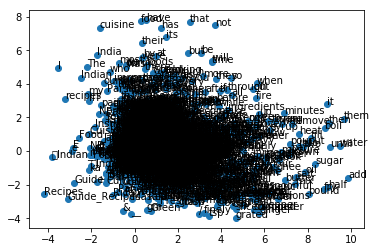

In [18]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()